这一节学一下matplot的用法

In [2]:
import numpy as np
import torch
from matplotlib_inline import backend_inline

In [3]:
def f(x):
    return 3 * x ** 2 - 4 * x

# 通过导数定义求导
def numerical_lim(f, x, h):
    return ( f(x+h ) - f(x) )/ h

h = 0.1
for i in range(5):
    print(f'{h:.5f},numerical_f={numerical_lim(f, 1, h):.5f}')
    h*=0.1

0.10000,numerical_f=2.30000
0.01000,numerical_f=2.03000
0.00100,numerical_f=2.00300
0.00010,numerical_f=2.00030
0.00001,numerical_f=2.00003


In [4]:
import matplotlib as plt
import matplotlib.pyplot as pt
def use_svg_display():
    # jupter使用svg格式显示图片
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize = (3.5 ,  2.5)):
    use_svg_display();
    # RcParams是matplotlib的配置参数
    # 这个字典值 是设置图片大小的,单位是英寸
    plt.rcParams['figure.figsize'] = figsize
def set_axes(axes, xlabel , ylabel ,xlim , ylim, xscale, yscale, legend):
    # 设置坐标轴标签,刻度,图例(legend)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)

    #是否生成图例
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X , Y =None , xlabel = None, ylabel = None, legend = None, xlim = None,
         ylim = None, xscale = 'linear' , yscale = 'linear',fmts = ('-','m--','g--','r:'),
          figsize = (3.5,2.5) ,axes = None):
    # 绘制数据点
    if legend is None:
        legend = [];
    set_figsize(figsize)
    axes = axes  if axes else pt.gca()
    # 如果x有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X , 'ndim') and X.ndim == 1 or isinstance(X, list) and 
                not hasattr(X[0],"__len__")) 
    # 如果有多条曲线把 X ， Y 分别放在两个列表，对应  [x1, x2] , [y1],y2] , x1 , y1 是列表
    if  has_one_axis(X):
        X = [X]
    if Y == None:
        X , Y = [[]] *len(X) , X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X *len(Y)

    axes.cla()
    # 注意 fmts 只设置了 4 种颜色，最多显示4条
    # 有两种显示模式，1-x-y模式，2-y模式（前面处理的时候，把x变成[]，数值存到中）
    for x , y , fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel,  xlim , ylim, xscale, yscale,legend)


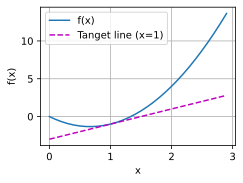

In [5]:
x = np.arange(0,3,0.1)
plot(x, [f(x), 2 * x -3], 'x', 'f(x)',legend=['f(x)', 'Tanget line (x=1)'])

练习

1.绘制函数
 $y = f(x) = x^3 - \frac{1}{x}$
和其在x = 1
处切线的图像。

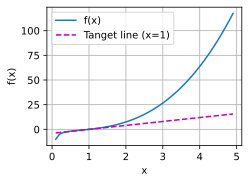

In [10]:

def f1(x):
    return x * x * x  - 1/x
x  = np.arange(0.1,5,0.1)
plot(x , [f1(x) , 4*x - 4], 'x', 'f(x)', legend=['f(x)','Tanget line (x=1)' ])


2.求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$
的梯度。



 $(6x_1^2, 5e^{x_2})$


3.函数 $f(\mathbf{x}) = \|\mathbf{x}\|_2$
的梯度是什么？


$\nabla f(\mathbf{x}) = \frac{\mathbf{x}}{\|\mathbf{x}\|_2}$


4.尝试写出函数 $u = f(x, y, z)$
，其中$x = x(a, b)$，$y = y(a, b)$和$z = z(a, b)$，的链式法则。

  ![20250101092237](https://raw.githubusercontent.com/Rainbow452/image/main/img/20250101092237.png)